# 1. Load and Prepare Data

## 1.1

In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('./iris.csv')

In [4]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.2

In [5]:
y = 1 * (d.species == 'virginica') + 2 * (d.species == 'versicolor')

# 2. Train k-NN model

## 2.1

In [6]:
k = 1

## 2.2

In [7]:
X = d[['sepal_width', 'petal_width']]

## 2.3

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
m = KNeighborsClassifier(n_neighbors=k).fit(X, y)

## 2.4

In [17]:
import numpy as np
import matplotlib.pyplot as plt

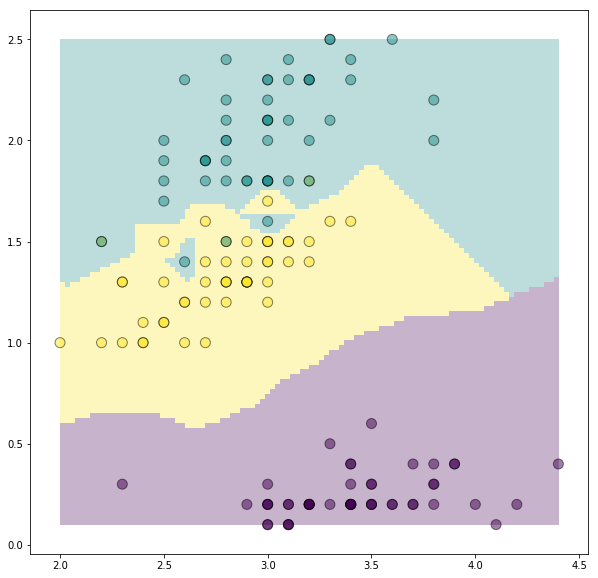

In [19]:
range1 = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
range2 = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10, 10))
plt.imshow(yhat.reshape((100, 100)), alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()], origin='lower', aspect='auto')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha = 0.5, edgecolor='k')

## 2.5

I think k-NN overfits because the two blue points that are in the majority yellow zone have blue lakes around them. They could simply be outliers, but the model classifies them as blue anyways.

# 3. Try different k, features

## 3.1

### k = 4, features = sepal length and petal length

In [20]:
k = 4

In [21]:
X = d[['sepal_length', 'petal_length']]

In [23]:
m = KNeighborsClassifier(n_neighbors=k).fit(X, y)

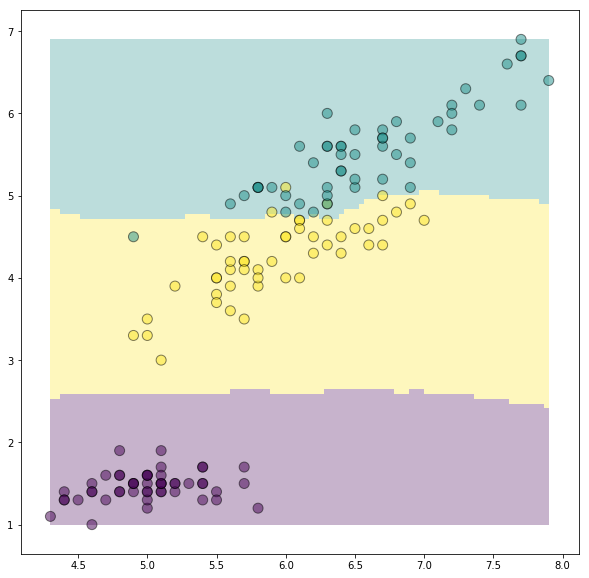

In [24]:
range1 = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
range2 = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10, 10))
plt.imshow(yhat.reshape((100, 100)), alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()], origin='lower', aspect='auto')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha = 0.5, edgecolor='k')

### k = 4, features = sepal width and petal width

In [25]:
X = d[['sepal_width', 'petal_width']]

In [26]:
m = KNeighborsClassifier(n_neighbors=k).fit(X, y)

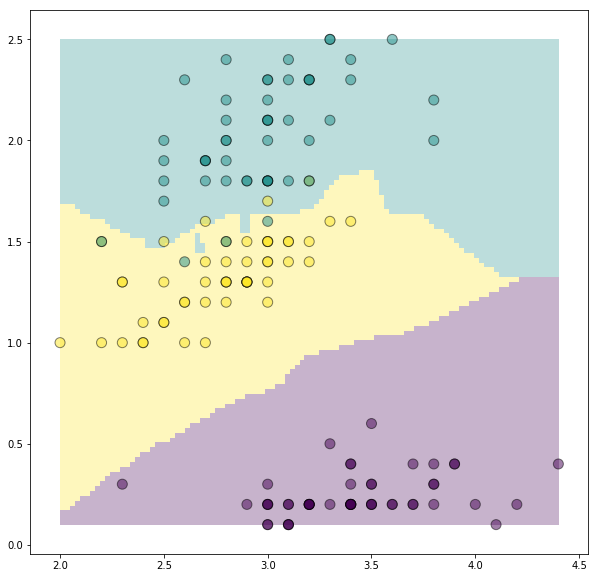

In [27]:
range1 = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
range2 = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10, 10))
plt.imshow(yhat.reshape((100, 100)), alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()], origin='lower', aspect='auto')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha = 0.5, edgecolor='k')

### k = 1, features = sepal length and petal length

In [28]:
k = 1

In [29]:
X = d[['sepal_length', 'petal_length']]

In [30]:
m = KNeighborsClassifier(n_neighbors=k).fit(X, y)

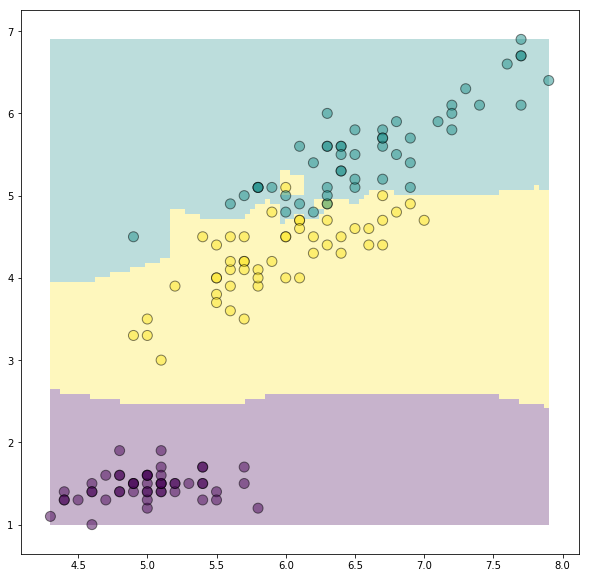

In [31]:
range1 = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
range2 = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(10, 10))
plt.imshow(yhat.reshape((100, 100)), alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()], origin='lower', aspect='auto')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, alpha = 0.5, edgecolor='k')

## 3.2

The second model which used k = 4 and the features sepal length and petal length seemed to be the best in terms of separating the species. There were clear lines between different classifications, and outliers were not used to expand the classification boundaries.

## 3.3

It seems that the higher the k value, the less sensitive the decision boundary is to individual data points. That is to say, with a larger k, there are fewer lakes aroung single points as the model no longer classifies based on the closest neighbor only.